In [515]:
import numpy as np
import pyvista as pv
import marching_2d_rules
import math

In [516]:
def num_digits(n):
    if n > 0:
        digits = int(math.log10(n)) + 1
    elif n == 0:
        digits = 1
    else:
        digits = int(math.log10(-n)) + 2
    return digits

Define the Total Dimension of the points

In [517]:
nxy = 25

Define Total point object ratio

In [518]:
ni_ratio = 0.5

Generate the Grid

In [519]:
dims = np.array([nxy, nxy, 1])
dims_plus1 = [dims[0] + 1, dims[1] + 1, dims[2]]
grid = pv.UniformGrid(
    dims=dims_plus1,
    spacing=(1, 1, 1),
    origin=(0, 0, 0),
)
points_t = np.transpose(grid.points.T)

Plotting the item object

In [520]:
non_boundary_n = (dims_plus1[0] - 2) * (dims_plus1[1] - 2)
n_item = int(non_boundary_n * ni_ratio)
points_i = np.concatenate([np.ones([n_item]), np.zeros([non_boundary_n - n_item])])
np.random.shuffle(points_i)
points_i = points_i.reshape((dims_plus1[0] - 2, dims_plus1[1] - 2))
points_i = np.pad(points_i, 1)
points_i = points_i.reshape(dims_plus1[0] * dims_plus1[1])
points_i = np.array(points_i, dtype=np.int)

Find Points square and Points type

In [521]:
cxy = dims[0] * dims[1]
cx = dims[0]
cxy_plus1 = dims_plus1[0] * dims_plus1[1]
cx_plus1 = dims_plus1[0]

points_square = []
points_type = []

for i in np.arange(0, np.prod(dims), 1, dtype=np.int):
    dz = i // cxy                                       # i div (dimension x and y) to get axis z
    dz_r = i - (dz * cxy)                               # get the remaining of dz
    dy = dz_r // cx                                     # remain of dz div (dimension of x) to get axis y
    dy_r = dz_r - (dy * cx)                             # get the remaining of dy
    dx = dy_r                                           # get the dx

    pt = dz * cxy_plus1 + dy * cx_plus1 + dx * 1        # mapping value to match array of points
    p0 = pt                                             # find the lowest x
    p1 = pt + 1                                         # find the lowest x + 1
    p2 = p0 + cx_plus1                                  # find the lowest x with y + 1
    p3 = p1 + cx_plus1                                  # find the lowest x + 1 with y + 1

    points_square.append(
        np.array(
            [
                points_t[p0],
                points_t[p1],
                points_t[p2],
                points_t[p3]
            ]
        )
    )

    points_type.append(
        (points_i[p0] << 3) + (points_i[p1] << 2) + (points_i[p2] << 1) + (points_i[p3] << 0)
    )

Generate Polylines

In [522]:
dictionary = {}
points_p = []
faces_p = []

digit_x = 10 ** (num_digits(nxy) + 1)
digit_y = 10 ** (num_digits(nxy) + 1)

max_z = digit_x * digit_y
max_y = digit_x

for i, o in enumerate(points_square):
    poly_points = marching_2d_rules.to_points(o, points_type[i])
    position = []
    for poly_point in poly_points:
        magnitude = poly_point[0] + (max_y * (poly_point[1] + 1)) + (max_z * (poly_point[2] + 1))
        if dictionary.get(magnitude) is None:
            points_p.append(poly_point)
            dictionary[magnitude] = len(points_p) - 1
        position.append(dictionary[magnitude])
    for poly_face in marching_2d_rules.to_faces(position, points_type[i]):
        faces_p.append(poly_face)

Display the plot

/Users/engineering/Documents/anaconda3/envs/shapely-pyvista/lib/python3.6/site-packages/pyvista/jupyter/notebook.py:60: UserWarning: Failed to use notebook backend: 

Please install `ipyvtklink` to use this feature: https://github.com/Kitware/ipyvtklink

Falling back to a static output.
  warnings.warn(f'Failed to use notebook backend: \n\n{e}\n\n'


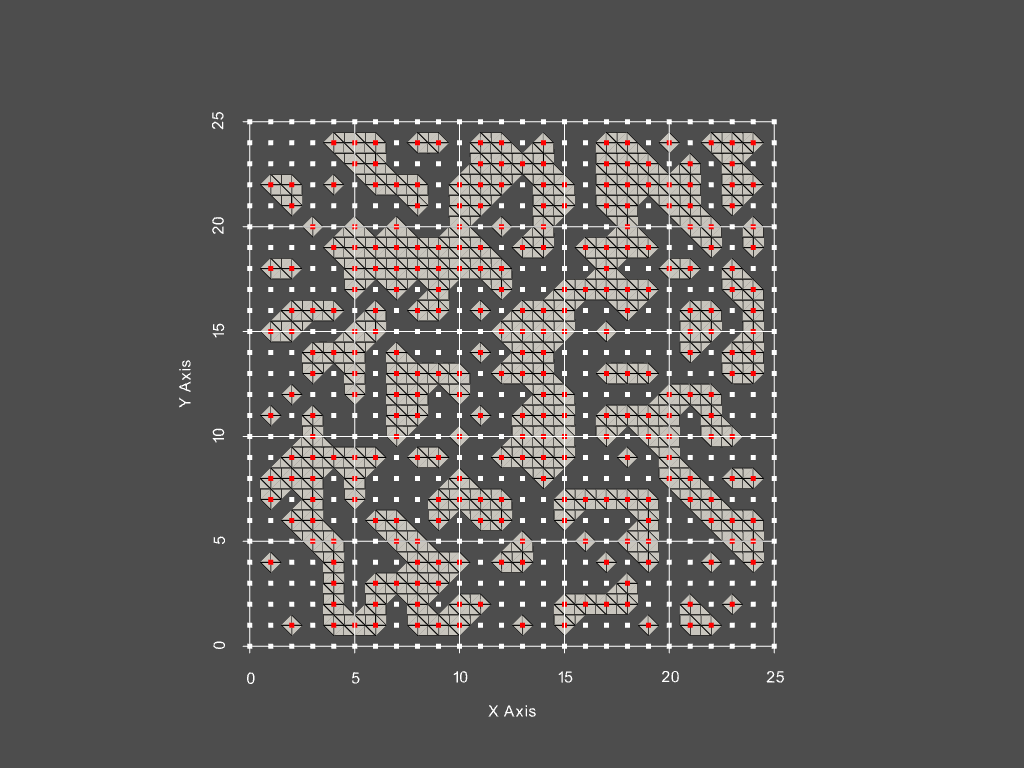

In [523]:
points_i_only = []
for i, o in enumerate(points_i):
    if o == 1:
        points_i_only.append(points_t[i])
points_i_only = np.array(points_i_only)

polyline = pv.PolyData(points_p, faces=np.array(faces_p).flatten())
plot = pv.Plotter()
plot.add_points(points_t)
plot.add_mesh(polyline, show_edges=True)
plot.add_points(points_i_only, scalars=points_i_only, cmap=['red'])
plot.show_bounds()
plot.show_grid()
plot.remove_scalar_bar()
plot.camera_position = 'xy'
plot.show()

In [524]:
print(len(points_p))
print(len(faces_p))

1486
2128
